Proszę pobrać dane breast-cancer oraz wybrać „1” kolumnę jako daną objaśnianą $y$ a wektory od „2” do „31” jako dane objaśniające.


In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
X = df.iloc[:,2:31]
y = df.iloc[:,1]
#print(y)
#df.head()

# Zadanie 1

Wykonaj na zbiorze treningowym 
  * StratifiedKFold
  
Dla każdego folda naucz regresje logistyczną na zbiorze dopełnień i waliduj na foldzie. Wypisz wyniki dopasowania na każdym flodzie.


In [2]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf=LogisticRegression(random_state=1,solver="lbfgs")

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle = True)
 
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)
print(scores)

[0.92982456 0.92982456 0.89473684 0.92982456 0.92982456 0.96491228
 1.         0.96491228 0.96491228 0.98214286]


# Zadanie 2

Wykonaj wykres, który w zależności od ilości danych w zbiorze uczącym pokaże wynik nauczonego algorytmu na danych testowych i treningowych.

Możesz użyć funkcji 
```python
learning_curve
```

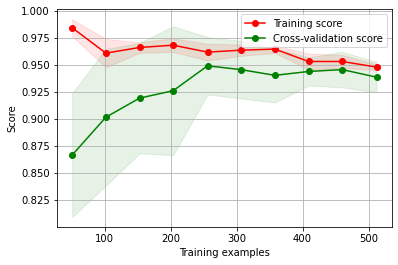

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores =learning_curve(estimator=clf, X=X, y=y, 
                                                           train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


axes = plt.axes()
axes.set_xlabel("Training examples")
axes.set_ylabel("Score")
axes.grid()
axes.fill_between(train_sizes, train_mean - train_std,
                         train_mean + train_std, alpha=0.1,
                         color="r")
axes.fill_between(train_sizes, test_mean - test_std,
                         test_mean + test_std, alpha=0.1,
                         color="g")
axes.plot(train_sizes, train_mean, 'o-', color="r",
                 label="Training score")
axes.plot(train_sizes, test_mean, 'o-', color="g",
                 label="Cross-validation score")
axes.legend(loc="best")

# Zadanie 3

Wykonaj wykres, który w zależności od paramtru $C$ w Regresji Logistycznej pokarze wynik nauczonego algorytmu na danych testowych i treningowych.

Możesz użyć funkcji 
```python
validation_curve
```

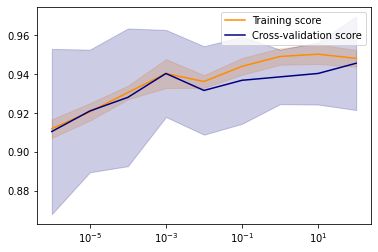

In [4]:
from sklearn.model_selection import validation_curve
param_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=clf, X=X,
y=y, param_name='C',
param_range=param_range, cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.semilogx(param_range, train_mean, label="Training score",
             color="darkorange")
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange")
plt.semilogx(param_range, test_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

# Zadanie 4

Wykonaj wykres jak powyżej na poniższych danych oraz dopasowjąc model LASSO z transformacją stopnia 17 (jak w zadaniu nr 1 z zestawu 7). Przed wykonaniem transformacji można użyć StandardScaler().

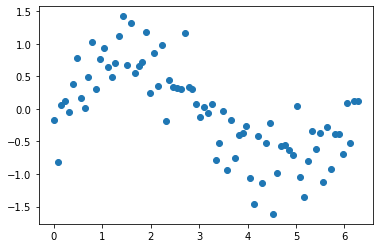

In [20]:
import numpy as np

x=np.linspace(0,2*np.pi,80)
y=np.sin(x)+np.random.normal(0,0.4,80)
y=y.reshape(-1, 1)
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [18]:
scaler_x = StandardScaler().fit_transform(x.reshape(-1,1))
scaler_y = StandardScaler().fit_transform(y)

poly = PolynomialFeatures(17).fit_transform(scaler_x)
X_train, X_test, y_train, y_test = train_test_split(poly ,scaler_y, test_size=.2)

model = Lasso(max_iter = 10000)

params = np.logspace(-5,4,9)
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y =y_train, param_name='alpha',param_range=params, cv = 10, n_jobs = -1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


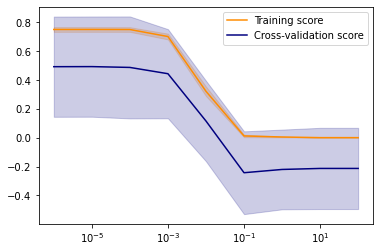

In [19]:
plt.semilogx(param_range, train_mean, label="Training score",
             color="darkorange")
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange")
plt.semilogx(param_range, test_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

# Zadanie 5
Dla danych z poprzedniego zadania wykonaj trzy kroki 
  * StandardScaler()
  * PolynomialFeatures(17)
  * LASSO()
  
za pomocą jednego Pipeline. 


In [12]:
x=np.linspace(0,2*np.pi,80)
y=np.sin(x)+np.random.normal(0,0.4,80)
x=x.reshape(-1,1)
y=y.reshape(-1, 1)


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = Pipeline([('scaler', StandardScaler()),('polynomial', PolynomialFeatures(17)), ('lasso', Lasso())])
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=17)),
                ('lasso', Lasso())])

In [15]:
print(pipe.get_params().keys())
params = np.logspace(-5,2,9)
train_scores, test_scores =  validation_curve(estimator=pipe, X=x_train, y =y_train, param_name='lasso__alpha',param_range=params, cv = 10, n_jobs = -1)


dict_keys(['memory', 'steps', 'verbose', 'scaler', 'polynomial', 'lasso', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'polynomial__degree', 'polynomial__include_bias', 'polynomial__interaction_only', 'polynomial__order', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])


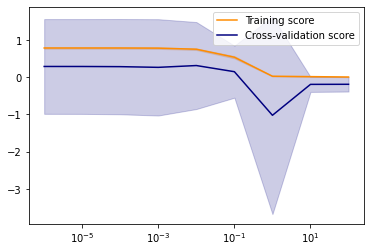

In [16]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.semilogx(param_range, train_mean, label="Training score",
             color="darkorange")
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange")
plt.semilogx(param_range, test_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

# Zadanie 6
Proszę narysować krzywą ROC oraz podać warość AUC dla któregoś z dzisiejszych przykładów.

In [10]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from scipy import interp
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.rename({1: 'diagnosis'}, axis = 1, inplace = True)
diagnosis = {'B': 0, 'M':1}
df['diagnosis'] = df['diagnosis'].map(diagnosis)
y = df['diagnosis']
df.drop(labels=[0,'diagnosis'], axis = 1, inplace = True)
X=df.dropna()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25)
model = Lasso(max_iter = 10000)

model2 = model.fit(X,y)
clf_reg = LogisticRegression()
clf_reg.fit(X_train,y_train)

C:\Users\micha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

ras: 0.9972043010752688


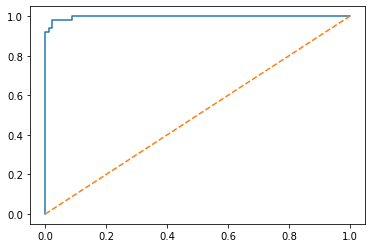

In [11]:
y_score1 = clf_reg.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score1)
print('ras:',roc_auc_score(y_test,y_score1))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],ls = "--")
plt.show()